In [1]:
#import bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
#wczytanie danych do datasetu pandas
dataset = pd.read_csv('./datasets/credit_card_frauds.csv',delimiter=",")
#print(dataset.head(10))

In [3]:
def wykresy_zmienne_model(X,Y):
    for i in range(1,X.shape[1]+1):
        #histogram dla zmiennej objaśniającej
        n, bins, patches = plt.hist(X.iloc[:,i-1], density=True, bins=100)  # `density=False` would make counts
        plt.ylabel('Counts')
        plt.xlabel(X.columns[i-1])
        plt.title('Histogram variable '+X.columns[i-1])
        plt.grid(True)
        plt.show()
        
        #histogramy zmiennej objaśniającej podzielonej na dwie grupy po klasie
        df_hist2 = pd.concat([X.iloc[:,i-1],Y], axis=1)
        is_norm = df_hist2[Y.name]==1
        df1 = df_hist2[is_norm]

        is_n_norm = df_hist2[Y.name]==0
        df2 = df_hist2[is_n_norm]

        dx = df1[X.columns[i-1]]
        dy = df2[X.columns[i-1]]

        plt.hist(dx, density=True, alpha=0.5, bins=100, label=[Y.name+' 1'])
        plt.hist(dy, density=True, alpha=0.5, bins=100, label=[Y.name+' 0'])
        plt.legend(loc='upper right')
        plt.title('Histogram of '+X.columns[i-1]+' grouped by Y')
        plt.show()
        
        #wyliczenie punktów odcięcia dla zmiennej objaśniająca przy założeni 0.05 prawdopodobieństwa wystąpienia od góry i dołu zakresu wartości
        lower_part = 0
        upper_part = 0
        for j in range(0, n.size) :
            if lower_part < 0.05 :
                lower_part += n[j]
                l_border = bins[j]

        for j in range(n.size-1, -1, -1) :
            if upper_part < 0.05 :
                upper_part += n[j]
                u_border = bins[j]
        comment_1 = 'Lower 0.05: ' + str(l_border)
        comment_2 = 'Upper 0.05: ' + str(u_border)
        print(comment_1)
        print(comment_2)
        
        #zakres wartości dla zmiennej objaśniającej i objaśnianej
        x_range = np.amax(bins)-np.amin(bins)
        y_range = np.amax(Y)-np.amin(Y)
        
        #dataset dla pogrupowanej zmiennej objaśniającej
        data_frame = pd.concat([X.iloc[:,i-1],Y], axis=1)
        data_frame['v_grp'] = np.ceil(data_frame[X.columns[i-1]]/(x_range/100))*(x_range/100)
        data_frame['y_grp'] = data_frame[['v_grp', Y.name]].groupby('v_grp').transform(np.mean)
        data_frame_grp = data_frame[['v_grp','y_grp']].drop_duplicates()
        
        #wykres funkcji Y = f(X)
        x_data = data_frame_grp['v_grp']
        y_data = data_frame_grp['y_grp']
        plt.scatter(x_data, y_data, c='b', alpha=0.75)
        plt.ylabel(Y.name)
        plt.xlabel(X.columns[i-1])
        plt.title('Plot '+Y.name+' X '+X.columns[i-1])
        x_ax_min = np.amin(bins)-(x_range*0.1)
        x_ax_max = np.amax(bins)+(x_range*0.1)
        y_ax_min = np.amin(Y)-(y_range*0.1)
        y_ax_max = np.amax(Y)+(y_range*0.1)
        plt.axis([x_ax_min, x_ax_max, y_ax_min, y_ax_max])
        plt.grid(True)
        plt.show()

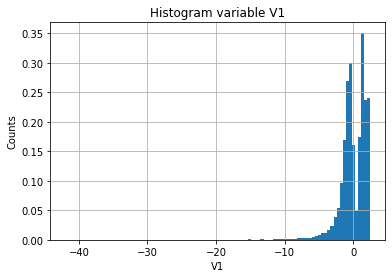

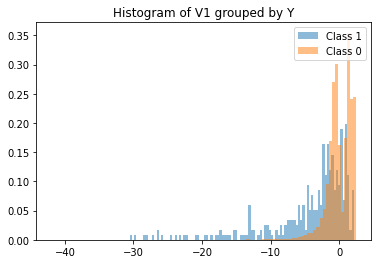

Lower 0.05: -5.092817931699997
Upper 0.05: 2.0080822299000047


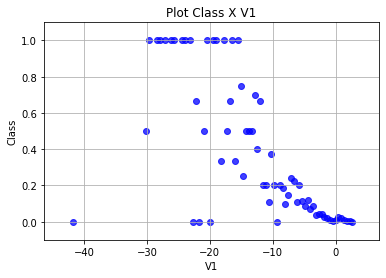

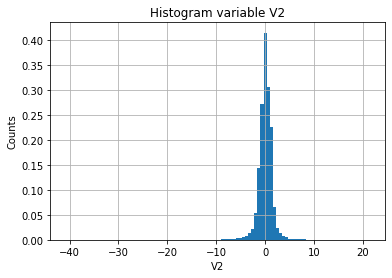

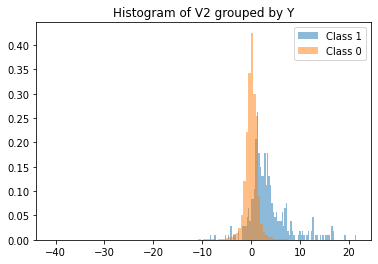

Lower 0.05: -2.8185588519000007
Upper 0.05: 2.163135884900001


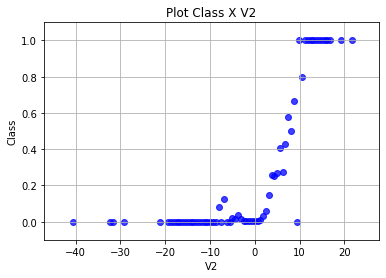

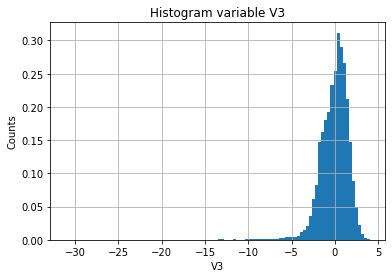

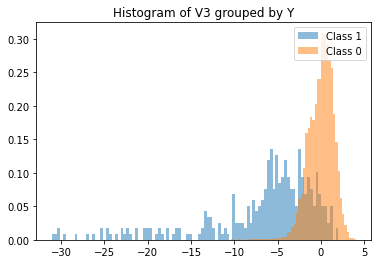

Lower 0.05: -4.02005162723
Upper 0.05: 2.3111873009499995


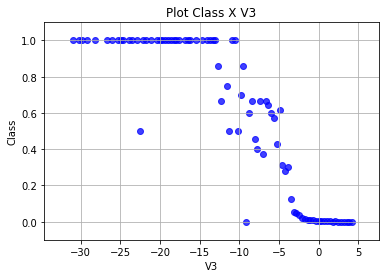

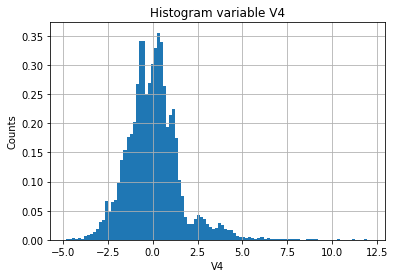

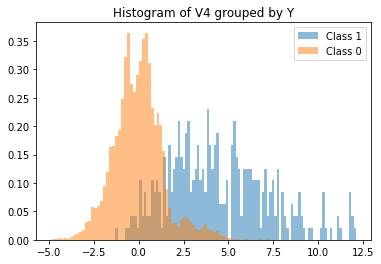

Lower 0.05: -3.3218177876499997
Upper 0.05: 4.990138165699999


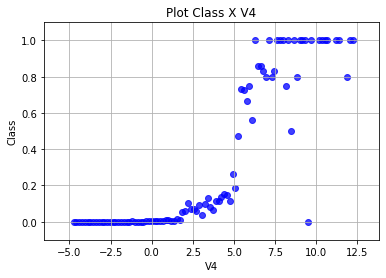

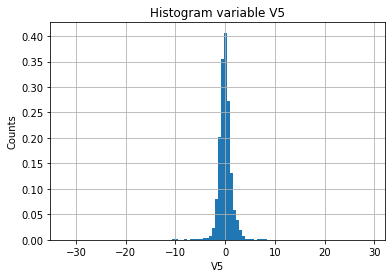

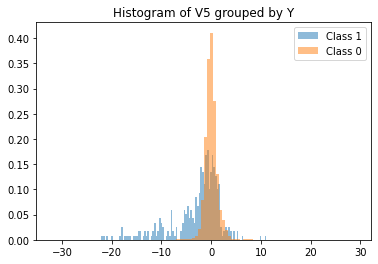

Lower 0.05: -2.690064510399999
Upper 0.05: 2.2102795712000045


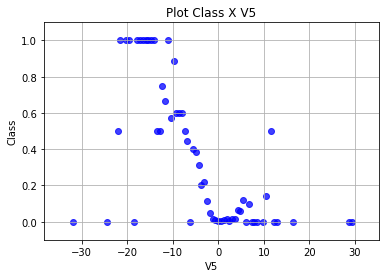

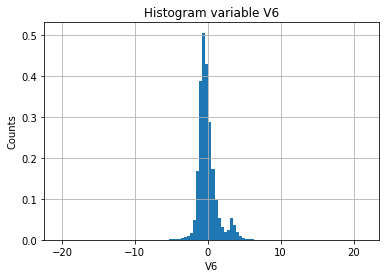

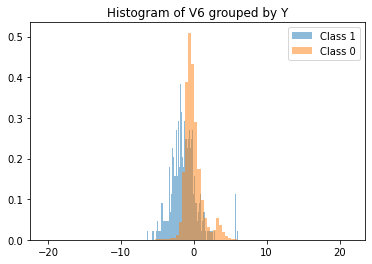

Lower 0.05: -1.9930381184000012
Upper 0.05: 3.435879549799999


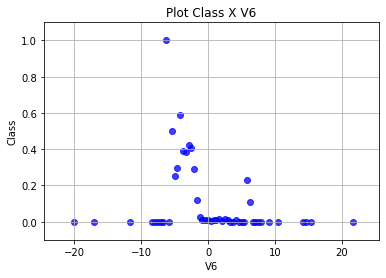

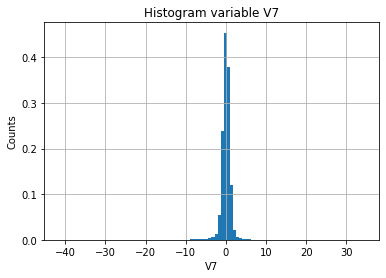

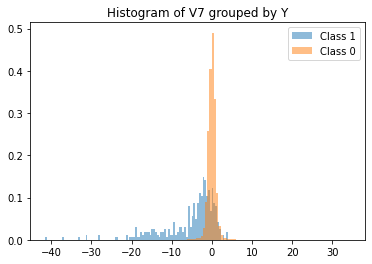

Lower 0.05: -2.085610151200008
Upper 0.05: 0.9467887663999974


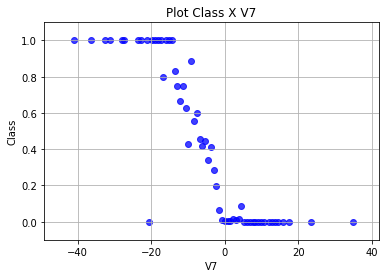

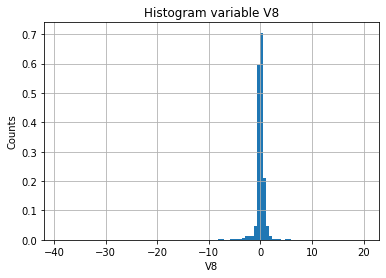

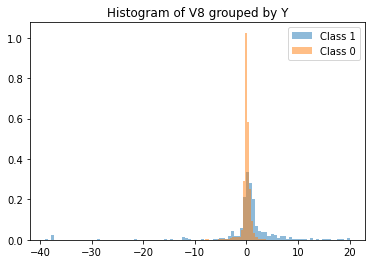

Lower 0.05: -2.410690651799996
Upper 0.05: 1.1289776148000001


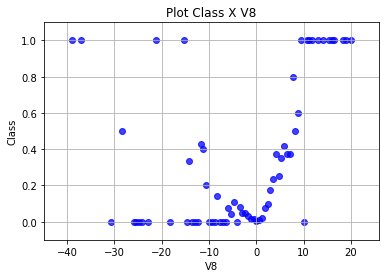

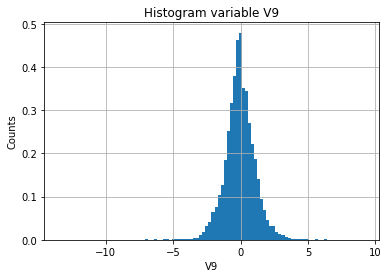

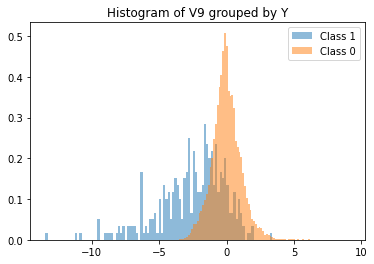

Lower 0.05: -2.8310537451899993
Upper 0.05: 2.5832505483299997


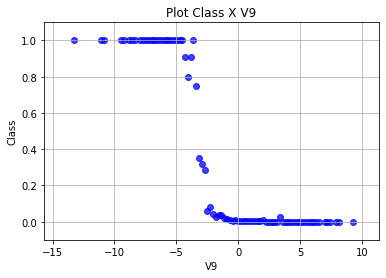

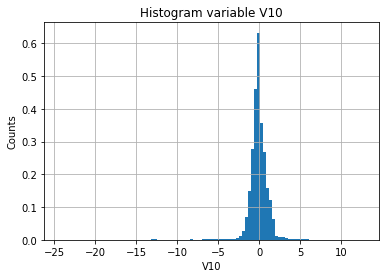

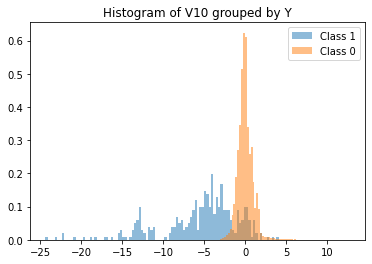

Lower 0.05: -2.511398122700001
Upper 0.05: 1.9411686937


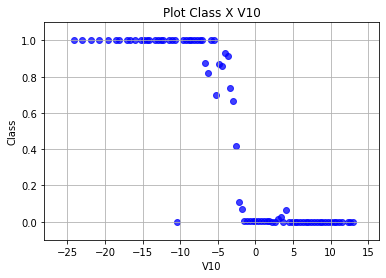

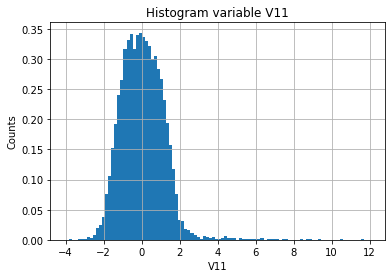

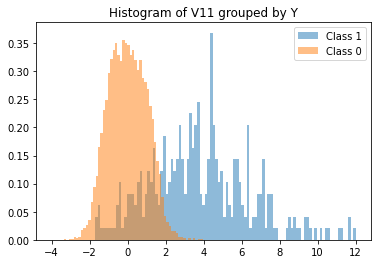

Lower 0.05: -2.23412763845
Upper 0.05: 3.6912938254000007


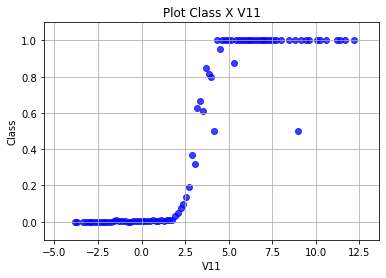

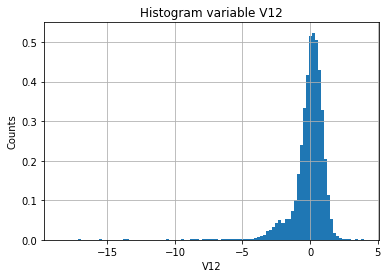

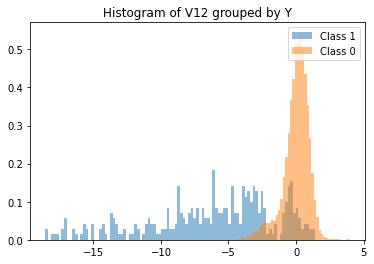

Lower 0.05: -3.9154871802500004
Upper 0.05: 1.489390295349999


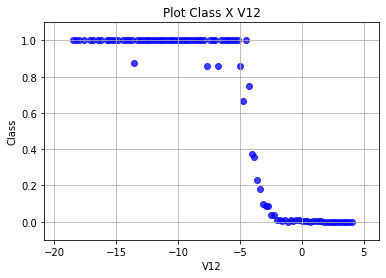

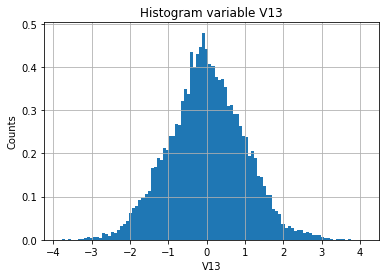

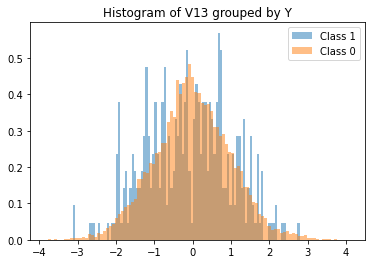

Lower 0.05: -2.73276803962
Upper 0.05: 2.748816567109999


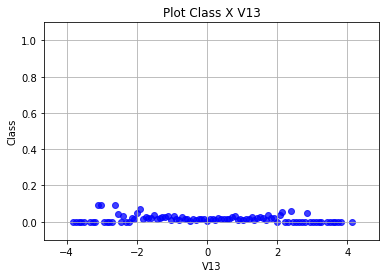

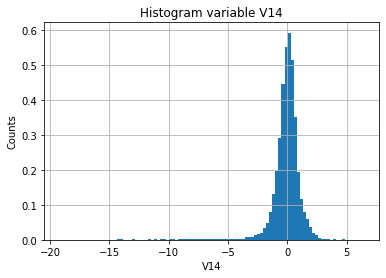

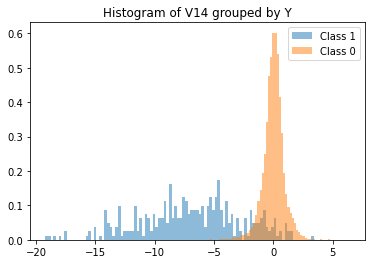

Lower 0.05: -4.590777723370001
Upper 0.05: 1.8230590163799967


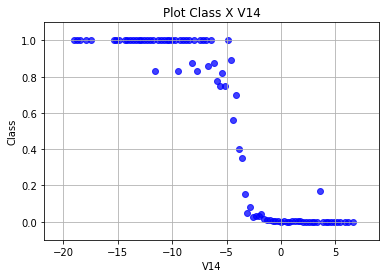

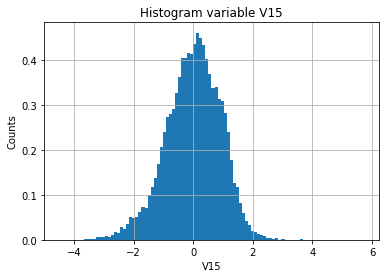

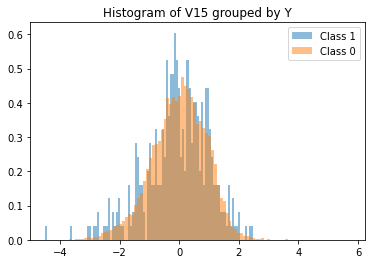

Lower 0.05: -2.7616427144699998
Upper 0.05: 2.14368047385


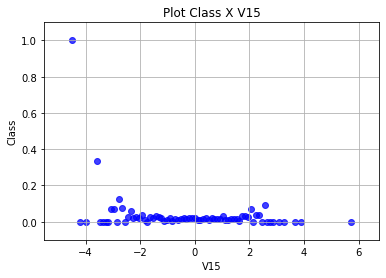

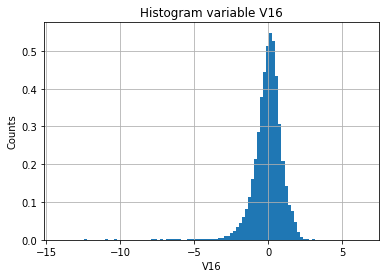

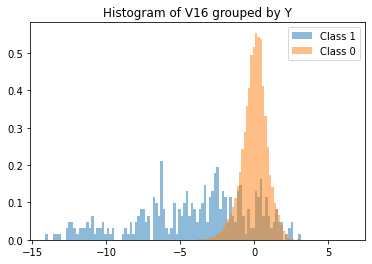

Lower 0.05: -3.2263487368699995
Upper 0.05: 1.7110878441700006


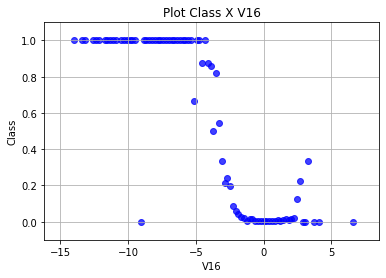

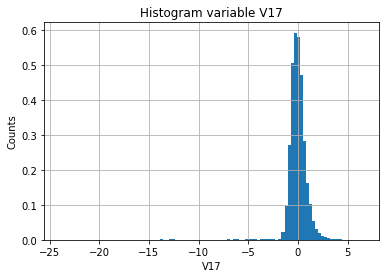

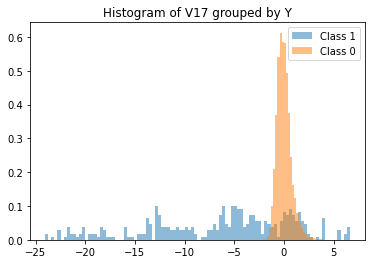

Lower 0.05: -1.660319567930003
Upper 0.05: 2.0150961551499975


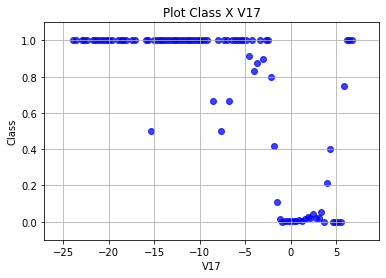

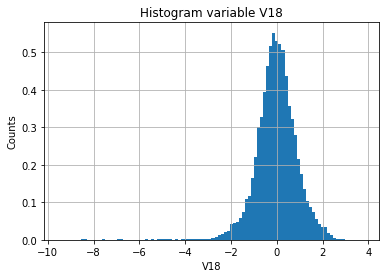

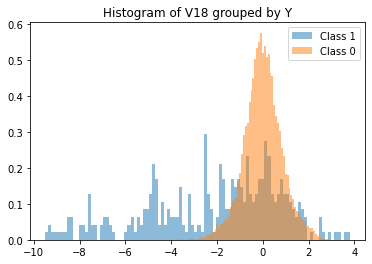

Lower 0.05: -2.98710547583
Upper 0.05: 2.062738134709999


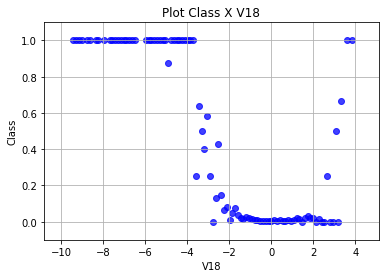

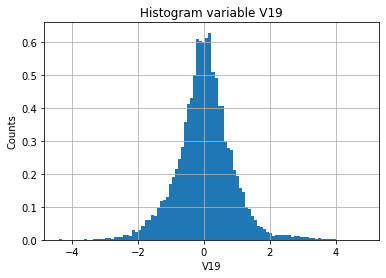

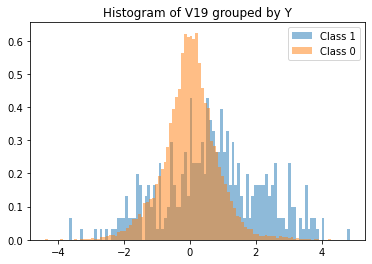

Lower 0.05: -2.5459753605999995
Upper 0.05: 2.909482131380001


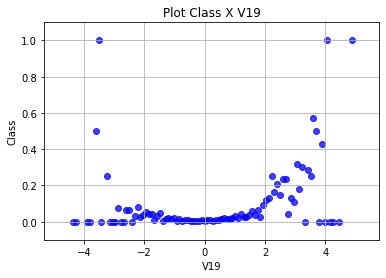

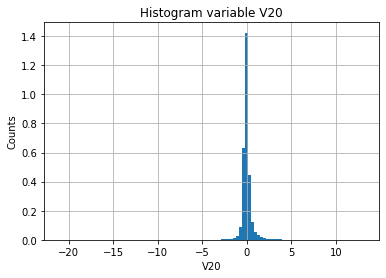

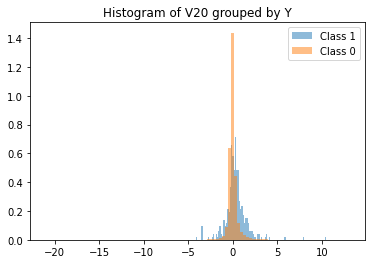

Lower 0.05: -1.2209284361999977
Upper 0.05: 1.5106424126000029


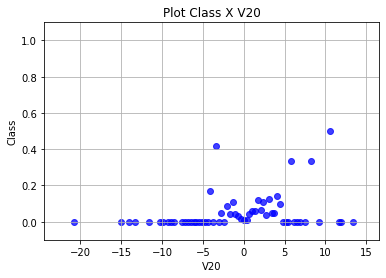

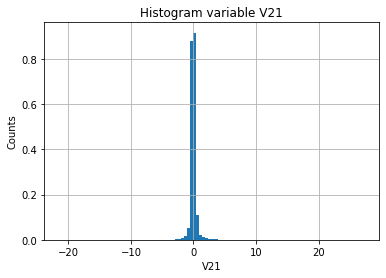

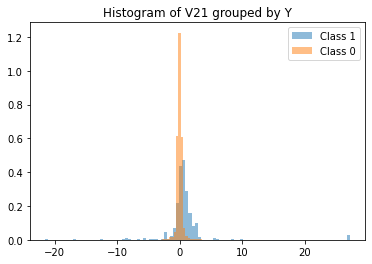

Lower 0.05: -1.0179745952000019
Upper 0.05: 0.9282884223999979


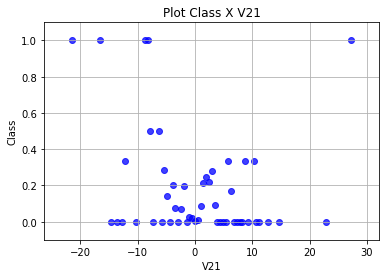

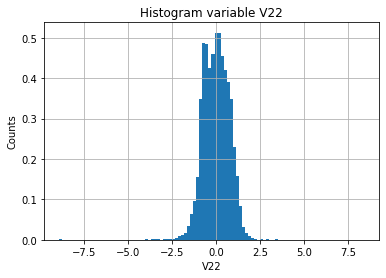

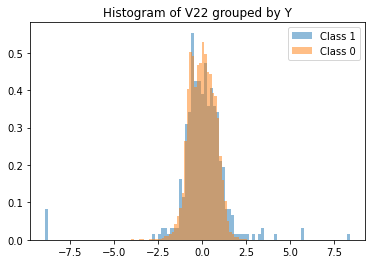

Lower 0.05: -1.81492618447
Upper 0.05: 1.4623842588000002


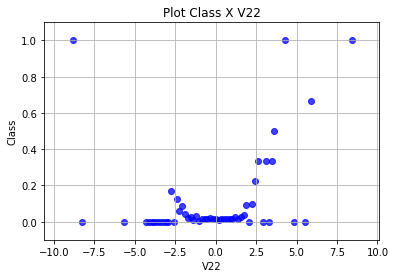

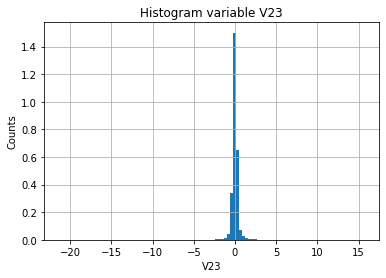

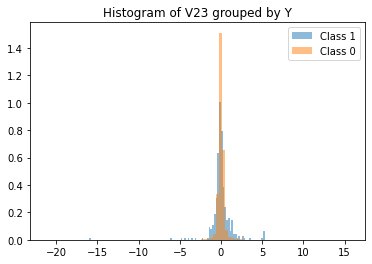

Lower 0.05: -0.9923127530000002
Upper 0.05: 0.8541738839999979


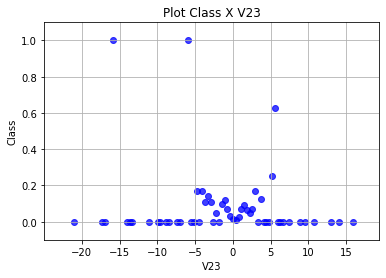

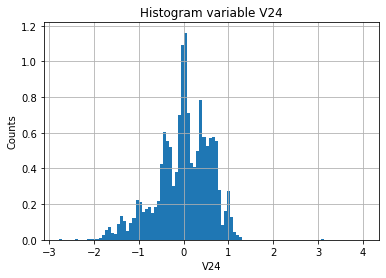

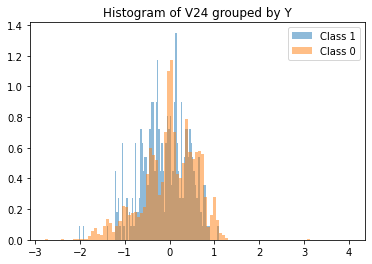

Lower 0.05: -1.8172861350000002
Upper 0.05: 1.1663899449999997


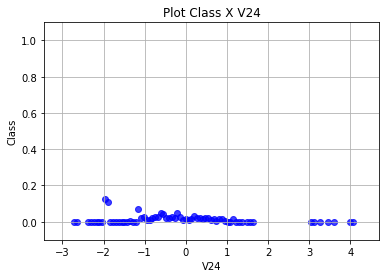

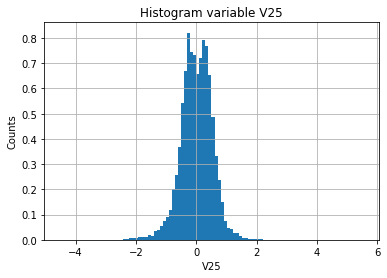

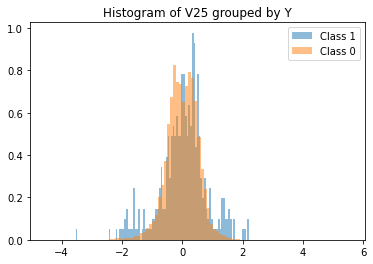

Lower 0.05: -1.8192964843100001
Upper 0.05: 1.3065626452599997


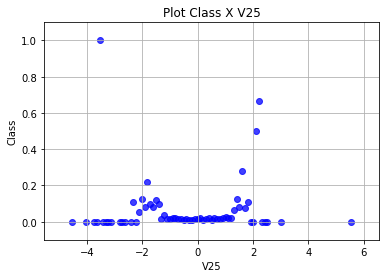

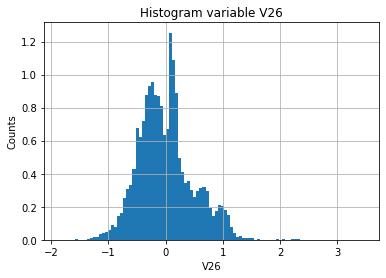

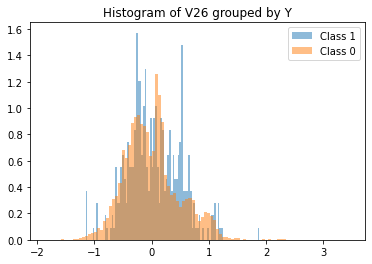

Lower 0.05: -1.2171232189600003
Upper 0.05: 1.4421772770399996


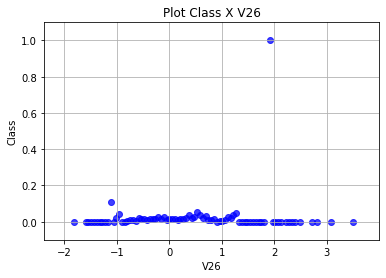

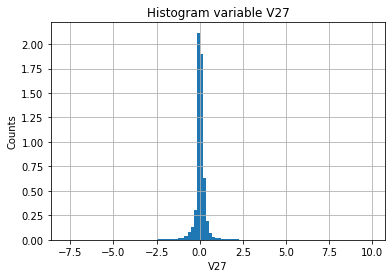

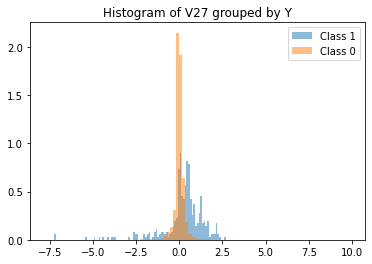

Lower 0.05: -1.5887293426999998
Upper 0.05: 1.0578781270000004


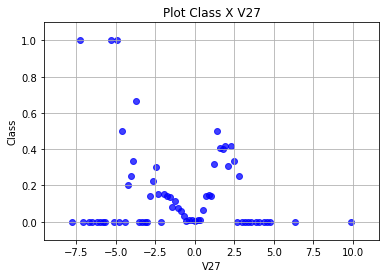

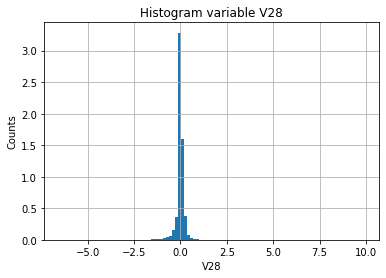

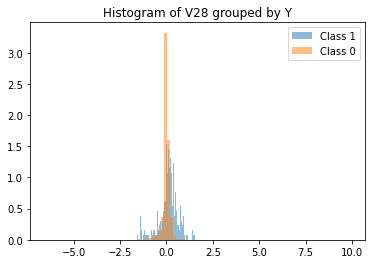

Lower 0.05: -1.1092478902899998
Upper 0.05: 0.5303966984100006


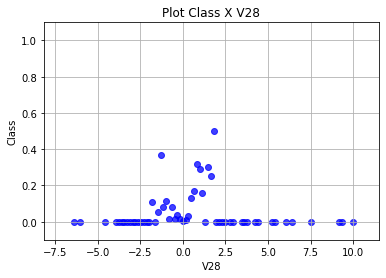

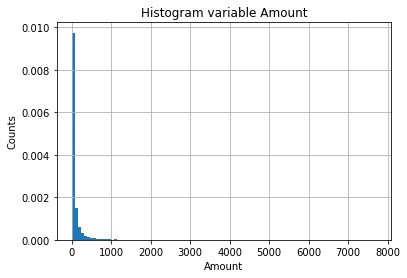

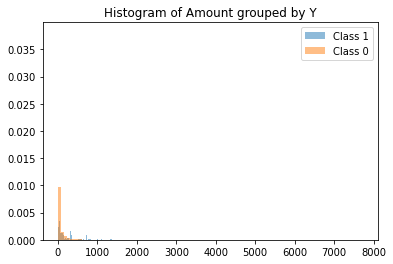

Lower 0.05: 7635.305700000001
Upper 0.05: 0.0


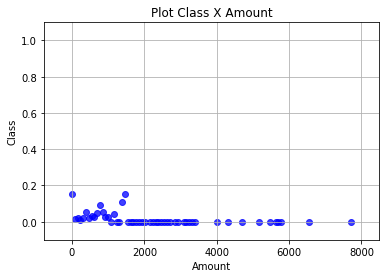

In [4]:
Y = dataset['Class']
X = dataset.iloc[:,:-1]
wykresy_zmienne_model(X,Y)

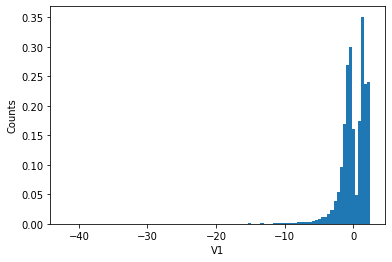

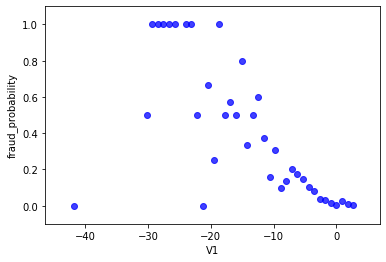

[1.03869241e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.07738483e-04 0.00000000e+00 1.03869241e-04
 0.00000000e+00 0.00000000e+00 2.07738483e-04 0.00000000e+00
 0.00000000e+00 1.03869241e-04 2.07738483e-04 0.00000000e+00
 1.03869241e-04 0.00000000e+00 0.00000000e+00 1.03869241e-04
 1.03869241e-04 0.00000000e+00 2.07738483e-04 2.07738483e-04
 2.07738483e-04 0.00000000e+00 0.00000000e+00 2.07738483e-04
 3.11607724e-04 1.03869241e-04 1.03869241e-04 1.03869241e-04
 3.11607724e-04 1.03869241e-04 3.11607724e-04 3.11607724e-04
 1.03869241e-04 4.15476966e-04 1.03869241e-04 0.00000000e+00
 7.27084690e-04 2.07738483e-04 2.07738483e-04 2.07738483e-04
 1.24643090e-03 4.154769

In [114]:
#histogram dla zmiennej V1
V1 = dataset['V1']
n, bins, patches = plt.hist(V1, density=True, bins=100)  # `density=False` would make counts
plt.ylabel('Counts')
plt.xlabel('V1')
plt.show()
#wykres prawdopodobieństwa wystąpienia frauda względam zmiennej V1
x_range = np.amax(bins)-np.amin(bins)
y_range = np.amax(dataset['Class'])-np.amin(dataset['Class'])

dataset['V1_grp'] = np.ceil(dataset['V1']/(x_range/50))*(x_range/50)
dataset['class_grp'] = dataset[['V1_grp','Class']].groupby('V1_grp').transform(np.mean)
dataset_grp = dataset[['V1_grp','class_grp']].drop_duplicates()

x = dataset_grp['V1_grp']
y = dataset_grp['class_grp']
plt.scatter(x, y, c='b', alpha=0.75)
plt.ylabel('fraud_probability')
plt.xlabel('V1')
x_ax_min = np.amin(bins)-(x_range*0.1)
x_ax_max = np.amax(bins)+(x_range*0.1)
y_ax_min = np.amin(dataset['Class'])-(y_range*0.1)
y_ax_max = np.amax(dataset['Class'])+(y_range*0.1)
plt.axis([x_ax_min, x_ax_max, y_ax_min, y_ax_max])
plt.show()

print(n)

2.0080822299000047
0.24024955539977189
99
-----------------
-5.092817931699997
0.053181051606001756
83


             V1        V2        V3        V4        V5        V6        V7  \
0      1.176563  0.323798  0.536927  1.047002 -0.368652 -0.728586  0.084678   
1      0.681109 -3.934776 -3.801827 -1.147468 -0.735540 -0.501097  1.038865   
2      1.140729  0.453484  0.247010  2.383132  0.343287  0.432804  0.093380   
3     -1.107073 -3.298902 -0.184092 -1.795744  2.137564 -1.684992 -2.015606   
4     -0.314818  0.866839 -0.124577 -0.627638  2.651762  3.428128  0.194637   
...         ...       ...       ...       ...       ...       ...       ...   
21688 -3.959670  3.297819 -1.079436 -2.290106 -1.405133  2.452586 -4.649235   
21689 -1.066503  0.539240  0.735343 -0.506800  0.843980 -1.047877  1.141302   
21690 -2.175162 -0.441681  1.883137 -0.267440  1.056972  0.136404  0.113595   
21691  0.031406  0.694817  0.083233 -0.797912  0.564318 -0.560787  0.805901   
21692 -0.312369  0.944738  1.430605  0.627951  0.317725 -0.180406  0.793108   

              V8        V9       V10  ...       V20